## Introducción
En esta práctica, abordaremos una serie de ejercicios enfocados en algoritmos de clasificación. Comenzaremos creando dos modelos de clasificación distintos para predecir las clases de un conjunto de datos específico [EX01](#EX01). Luego, compararemos estos modelos utilizando diversas métricas como la precisión (accuracy), matrices de confusión, y otras métricas avanzadas para evaluar su rendimiento [EX02](#EX02). Posteriormente, optimizaremos estos modelos ajustando sus parámetros con el objetivo de mejorar las predicciones [EX03](#EX03). Además, compararemos el rendimiento de los modelos utilizando tanto la técnica de división entrenamiento/prueba como la validación cruzada [EX04](#EX04) y [EX05](#EX05). Finalmente, aplicaremos técnicas de ingeniería de características, como la normalización o estandarización, para mejorar aún más los resultados de nuestros modelos de clasificación [EX05](#EX05). Todo ello queda resumido en la [conclusión](#conclusion).

# Importaciones y datos <a name="importacionesydatos"></a>

In [1]:
import pandas as pd

In [2]:
print(open('wineNames.txt').read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [3]:
caracteristicas = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
         "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
         "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wines = pd.read_csv('wineData.txt', sep=',', encoding='utf-8', names=caracteristicas)

# Limpieza de datos <a name="limpieza-datos"></a>

Empezaremos inspeccionando y limpiando los datos si es necesario ...

In [4]:
wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wines.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


En head y tail podemos ver la estructura de los datos, todos ellos de carácter aparentemente numérico, el primer atributo con las clases (variable dependiente), categórica sin jerarquía, y el resto de atributos con distintas medidas químicas de cada vino.

Veámoslo con más detalle:

In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Efectivamente comprobamos como todos los datos son de tipo numérico, int y coma flotante, de manera adecuada. No hay datos nulos.

In [7]:
wines.duplicated().sum()

0

Ni hay filas duplicadas.

Separemos ya la variable dependiente de las independientes, lo que nos permitirá hacer una descripción estadística diferenciada:

In [8]:
X = wines[caracteristicas].drop('Class', axis=1)
y = wines.Class

In [9]:
X.describe().round(1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


Las medias en este caso son muy parecidas a las medianas, lo que nos podría estar hablando de distribuciones normales, pero esto es algo que veremos luego, así como la presencia de outliers o no, para decidir el tipo de transformación que aplicamos. A nivel de escala, hay un par de variables con una escala sensiblemente distinta al resto: `Magnesium` y `Proline`, que son además las que muestran una desviación típica alejada del 1.  
Con esto ya tenemos una aproximación a la distribución de las variables independientes.

In [10]:
clases = y.value_counts()
print(clases)
print()
print('Total: '+str(clases.sum()))

2    71
1    59
3    48
Name: Class, dtype: int64

Total: 178


En cuanto a la variable dependiente, tal y como nos indica la descripción, tenemos tres valores posibles: 1, 2 y 3, las tres clases de vino.

# EX01. Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.<a name="EX01"></a>

En primer lugar dividimos el dataset original en los subconjuntos de entrenamiento y prueba, lo que nos permitirá evaluar el rendimiento de ambos modelos.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modelo 1: árbol de decisión

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

Ajustamos el modelo a los datos de entrenamiento.

In [15]:
y_tree = clf_tree.predict(X_test)
y_tree

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

Obtenemos las predicciones para y de acuerdo con el modelo y los datos de entrenamiento de X. Esto nos servirá después para calcular el nivel de precisión del modelo con respecto de los datos test.

# Modelo 2: KNN

De manera similar, repetimos el proceso para el *algoritmo de los vecinos cercanos* (KNN), que nos permite inferir la variable dependiente en base a las muestras disponibles más cercanas.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

Ajustamos el modelo KNN a los datos de entrenamiento (X_train e y_train).

In [17]:
y_knn = clf_knn.predict(X_test)
y_knn

array([2, 2, 3, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 1])

... y obtenemos la predicción de clases para el subconjunto test con el modelo KNN.

# EX02. Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.<a name="EX02"></a>

Ahora tenemos las predicciones hechas por los dos modelos guardadas en y_tree y en y_knn, mientras y_test no varía, con lo cual nos tiene que resultar sencillo calcular el rendimiento de ambos modelos utilizando la precisión, las matrices de confusión ...

In [18]:
print("Precisión tree:", metrics.accuracy_score(y_test, y_tree).round(2))

Precisión tree: 0.96


Obtenemos la precisión para el primer modelo (decision tree).

In [19]:
print("Precisión KNN:", metrics.accuracy_score(y_test, y_knn).round(2))

Precisión KNN: 0.7


... y para el segundo modelo (KNN).

Accuracy = (TP + TN) / (TP + TN + FP + FN)

El significado de la precisión (Accuracy) es el número de clasificaciones acertadas (true positives + true negatives), dentro del total de clasificaciones hechas (TP + TN + false positives + false negatives) entre las tres clases.

Por lo tanto 0.93 significa, de cada 100 predicciones que hace decision tree para una determinada clase, teniendo en cuenta los valores incluidos y excluidos, 93 son aciertos.

Vemos como en este caso la precisión del modelo `DecisionTreeClassifier` es más alta que la de KNN.

Esto se puede deber a la mayor sensibilidad a la escala del modelo KNN, lo que comprobaremos más adelante transformando los datos.

Vamos ahora con la matriz de confusión:

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
print('Matriz de confusión tree:\n')
confusion_matrix(y_test, y_tree)

Matriz de confusión tree:



array([[22,  1,  0],
       [ 0, 18,  1],
       [ 0,  0, 12]])

Aquí la matriz de confusión para el primer modelo, siempre en orden: clase 1 - clase 2 - clase 3. Por lo tanto en la diagonal el número de valores correctamente clasificados para el subconjunto test, en las clases 1 - 2 - 3, y fuera de ella los que no, el orden es filas - columnas, por lo tanto: primera fila segunda columna, valores que pertenecían a la primera clase pero se han clasificado de manera equivocada en la segunda; y primera columna - segunda fila serían los que se han clasificado en la primera clase pero pertenecían a la segunda.

In [22]:
print('Matriz de confusión KNN:\n')
confusion_matrix(y_test, y_knn)

Matriz de confusión KNN:



array([[21,  0,  2],
       [ 2, 12,  5],
       [ 0,  7,  5]])

Vemos como la matriz de confusión del modelo KNN muestra 11 predicciones incorrectas (fuera de la diagonal) del total de 54 para el subconjunto de prueba (test).

Otra medida del rendimiento es el recall (o sensibilidad): TP / (TP + FN), que nos dice del total que pertenecían a cada clase, cuántos ha clasificado correctamente en la clase correspondiente el modelo.



In [23]:
from sklearn.metrics import recall_score

print('Recall tree: '+str(recall_score(y_test, y_tree, average='macro').round(2)))
print('Recall KNN: '+str(recall_score(y_test, y_knn, average='macro').round(2)))

Recall tree: 0.97
Recall KNN: 0.65


Al indicar average=macro estamos teniendo en cuenta el total de 'aciertos' y 'errores' entre las tres clases, sin ponderar.
De nuevo, la interpretación es muy parecida, del total que pertenecían a cada clase el modelo ha predicho correctamente el 96% y el 65% respectivamente (para los modelos de árbol y KNN).

Promediando las dos medidas anteriores tenemos el f1 score, la fórmula es: 2 x (Precision+Recall)/(PrecisionxRecall)

In [24]:
from sklearn.metrics import f1_score

In [25]:
print('f1 decision tree: '+str(f1_score(y_test, y_tree, average='macro').round(2)))
print('f1 KNN: '+str(f1_score(y_test, y_knn, average='macro').round(2)))

f1 decision tree: 0.96
f1 KNN: 0.65


En este caso observamos como los resultados son de nuevo dispares según el modelo utilizado. La interpretación en este caso sería: cuán acertado es el modelo teniendo en cuenta tanto precisión (predicciones correctas del total) como sensibilidad (cuánto no se ha dejado fuera si nos centramos en las 'positivas').

# EX03. Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.<a name="EX03"></a>

En primer lugar vamos a comprobar cuáles son los parámetros que toman los modelos por defecto:

In [26]:
print('Parámetros tree: '+str(clf_tree.get_params()))
print()
print('Parámetros KNN: '+str(clf_knn.get_params()))

Parámetros tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Parámetros KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


En segundo lugar vamos a utilizar RandomizedSearchCV para obtener los parámetros óptimos para cada modelo de entre una muestra aleatoria:

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'random_state': [None, 42]
}

model_random = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid_tree, n_iter=100, cv=5, random_state=1)
model_random.fit(X_train, y_train)
print("Mejores parámetros tree: ", model_random.best_params_)
params_tree = model_random.best_params_

Mejores parámetros tree:  {'random_state': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}


Repetimos el proceso para KNN:

In [29]:
param_grid_knn = {
     'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

model_random = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=64, cv=5, random_state=1)
model_random.fit(X_train, y_train)
print("Mejores parámetros KNN: ", model_random.best_params_)
params_knn = model_random.best_params_

Mejores parámetros KNN:  {'weights': 'distance', 'p': 1, 'n_neighbors': 20, 'algorithm': 'auto'}


Ahora ya tenemos los parámetros óptimos según `RandomizedSearchCV` para entrenar nuestros modelos. Sigamos:

In [30]:
best_clf_tree = DecisionTreeClassifier(**params_tree)

In [31]:
best_clf_knn = KNeighborsClassifier(**params_knn)

Entrenamos los dos modelos desempaquetando los parámetros óptimos guardados en las variables params_tree y params_knn.

In [32]:
best_clf_tree.fit(X_train, y_train)
best_clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')

# EX04. Compara el seu rendiment fent servir l’aproximació train/test o cross-validation.<a name="EX04"></a>

Utilizaremos la aproximación train/test:

In [33]:
y_tree_best = best_clf_tree.predict(X_test)
score_y_tree_best = f1_score(y_test, y_tree_best, average='macro').round(2)
print('f1 tree óptimo: ', score_y_tree_best)

f1 tree óptimo:  0.98


In [34]:
y_knn_best = best_clf_knn.predict(X_test)
score_y_knn_best = f1_score(y_test, y_knn_best, average='macro').round(2)
print('f1 knn óptimo: ', score_y_knn_best)

f1 knn óptimo:  0.74


Vemos como el rendimiento f1 al utilizar parámetros óptimos mejora en ambos modelos, pasando de 0.92 a 0.94 para decision tree y de 0.65 a 0.74 con knn.

# EX05. Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...).<a name="EX05"></a>

Primero vamos a comprobar la normalidad de las distribuciones y la presencia de valores extremos en el subconjunto de entrenamiento, con el objetivo de elegir los métodos de estandarización adecuados.

In [35]:
from scipy.stats import shapiro

In [36]:
for x in X_train:
  stat, p = shapiro(X_train[x])
  if p > 0.05:
    print(x+': Gaussiana'+' - p='+f"{p:.5f}")
  else:
    print(x+': No gaussiana'+' - p='+f"{p:.5f}")

Alcohol: Gaussiana - p=0.46630
Malic acid: No gaussiana - p=0.00000
Ash: Gaussiana - p=0.07849
Alcalinity of ash: Gaussiana - p=0.44874
Magnesium: No gaussiana - p=0.00002
Total phenols: No gaussiana - p=0.02640
Flavanoids: No gaussiana - p=0.00034
Nonflavanoid phenols: No gaussiana - p=0.00118
Proanthocyanins: No gaussiana - p=0.00155
Color intensity: No gaussiana - p=0.00000
Hue: No gaussiana - p=0.01888
OD280/OD315 of diluted wines: No gaussiana - p=0.00017
Proline: No gaussiana - p=0.00001


Ya tenemos las variables gaussianas, vamos a estandarizarlas:

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

gaussianas = ['Alcohol','Ash','Alcalinity of ash']

for x in gaussianas:
  X_train[x] = scaler.fit_transform(X_train[[x]])
  X_test[x] = scaler.fit_transform(X_test[[x]])

Ya tenemos las variables gaussianas estandarizadas y guardadas en X_train y X_test. Veremos ahora los valores extremos en el resto de variables, para diferenciar en cuáles aplicamos MinMax (sin outliers) y en cuáles RobustScaler(con outliers):

In [38]:
no_gaussianas = []

for x in X.columns:
  if x not in gaussianas:
    no_gaussianas.append(x)

Guardamos los nombres de las variables no gaussianas en un array, y ya podemos iterar sobre ellas para mostrarlas gráficamente:

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

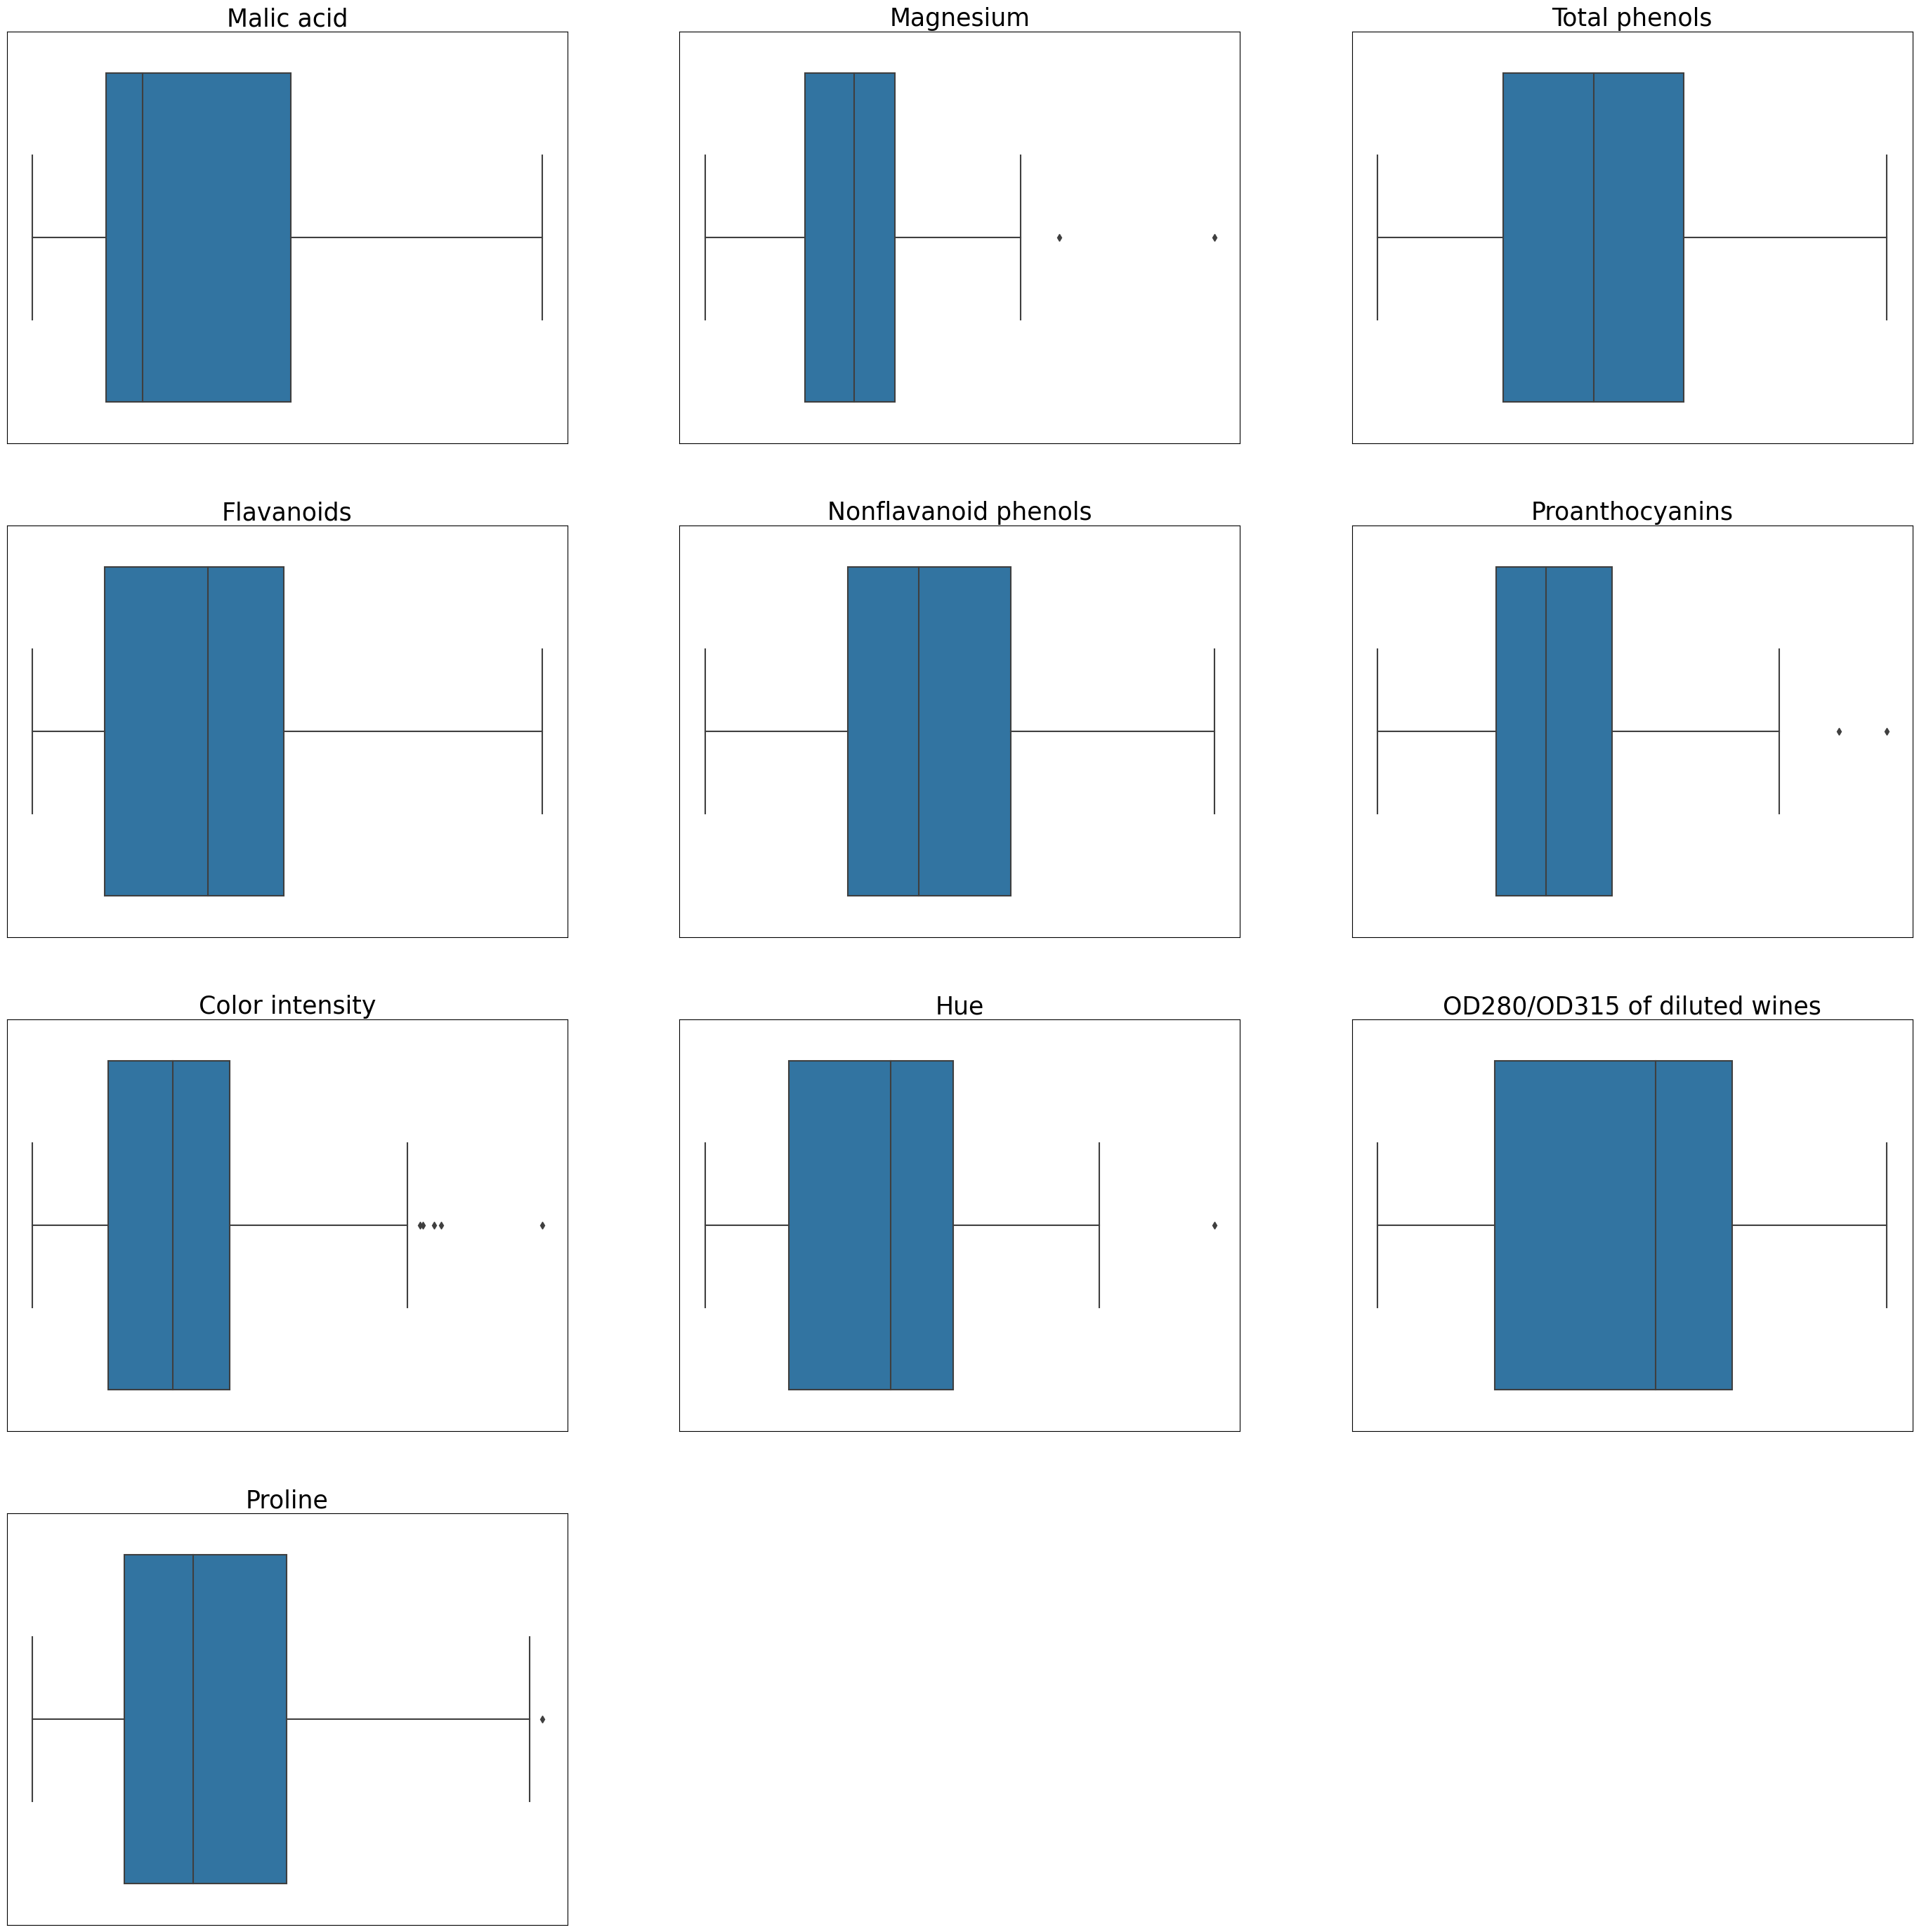

In [40]:
fig, axes = plt.subplots(4, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for x in X_train[no_gaussianas]:
  sns.boxplot(X_train[x], ax=axes[i], orient='h')
  axes[i].set_title(x, fontsize=25)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  i +=1

axes[10].set_visible(False)
axes[11].set_visible(False)

In [41]:
for x in no_gaussianas:
  print (x)

Malic acid
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline


In [42]:
extremos = ['Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue', 'Proline']
no_extremos = []

for x in no_gaussianas:
  if x not in extremos:
    no_extremos.append(x)

Guardamos los nombres de las columnas con y sin valores extremos dentro de las no gaussianas en dos nuevas listas.  
Ahora ya podemos aplicar la estandarización:

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()

for x in extremos:
  X_train[x] = scaler.fit_transform(X_train[[x]])
  X_test[x] = scaler.fit_transform(X_test[[x]])

scaler = RobustScaler()

for x in no_extremos:
  X_train[x] = scaler.fit_transform(X_train[[x]])
  X_test[x] = scaler.fit_transform(X_test[[x]])

Tenemos todas las variables para los subconjuntos train y test estandarizadas y guardadas en X_train y en X_test:

In [44]:
X_train.describe().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00
mean,-0.00,0.28,-0.00,0.00,0.31,0.03,-0.02,0.18,0.36,0.31,0.35,-0.15,0.36
std,1.00,0.67,1.00,1.00,0.15,0.61,0.60,0.75,0.19,0.20,0.21,0.57,0.23
min,-2.44,-0.60,-2.39,-2.66,0.00,-1.19,-0.98,-1.31,0.00,0.00,0.00,-1.17,0.00
25%,-0.78,-0.20,-0.57,-0.61,0.20,-0.50,-0.57,-0.44,0.23,0.15,0.17,-0.68,0.18
50%,0.06,0.00,-0.08,-0.06,0.29,0.00,0.00,0.00,0.33,0.27,0.37,0.00,0.31
75%,0.72,0.80,0.71,0.57,0.37,0.50,0.43,0.56,0.46,0.39,0.49,0.32,0.50
max,2.39,2.16,3.18,2.76,1.00,1.62,1.87,1.81,1.00,1.00,1.00,0.97,1.00


In [45]:
X_test.describe().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00
mean,-0.00,0.32,-0.00,-0.00,0.29,-0.12,-0.09,0.13,0.50,0.34,0.57,-0.20,0.36
std,1.01,0.93,1.01,1.01,0.24,0.59,0.58,0.66,0.20,0.22,0.26,0.74,0.27
min,-2.02,-1.08,-3.81,-2.35,0.00,-1.24,-1.13,-0.89,0.00,0.00,0.00,-1.79,0.00
25%,-0.87,-0.22,-0.43,-0.73,0.08,-0.63,-0.64,-0.37,0.37,0.14,0.46,-0.64,0.15
50%,0.19,0.00,0.08,0.00,0.25,0.00,0.00,0.00,0.53,0.34,0.58,0.00,0.28
75%,0.76,0.78,0.62,0.68,0.45,0.37,0.36,0.63,0.63,0.45,0.74,0.36,0.54
max,1.49,3.05,1.97,3.05,1.00,0.82,0.91,1.68,1.00,1.00,1.00,0.81,1.00


Estamos ya en condiciones de aplicar nuestros modelos predictivos de machine learning.

In [46]:
best_clf_tree.fit(X_train, y_train)
best_clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')

Vamos ahora a repetir el proceso de entrenamiento y predicción para los dos modelos en su versión óptima y ver si obtenemos un aumento del rendimiento.

In [47]:
y_tree_best_scaled = best_clf_tree.predict(X_test)
score_y_tree_best = f1_score(y_test, y_tree_best_scaled, average='macro').round(2)
print('f1 tree óptimo escalado: ', score_y_tree_best)

f1 tree óptimo escalado:  0.83


In [48]:
y_knn_best_scaled = best_clf_knn.predict(X_test)
score_y_knn_best = f1_score(y_test, y_knn_best_scaled, average='macro').round(2)
print('f1 knn óptimo escalado: ', score_y_knn_best)

f1 knn óptimo escalado:  0.98


In [49]:
from sklearn.metrics import classification_report

print('Tree:')
report_tree_scaled = classification_report(y_test, y_tree_best_scaled)
print(report_tree_scaled)

print('KNN:')
report_knn_scaled = classification_report(y_test, y_knn_best_scaled)
print(report_knn_scaled)

Tree:
              precision    recall  f1-score   support

           1       0.95      0.83      0.88        23
           2       0.78      0.74      0.76        19
           3       0.75      1.00      0.86        12

    accuracy                           0.83        54
   macro avg       0.83      0.85      0.83        54
weighted avg       0.84      0.83      0.83        54

KNN:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Al transformar los parámetros de entrenamiento y prueba y aplicar de nuevo los dos modelos con los parámetros optimizados, observamos lo siguiente:  

- El rendimiento del modelo `DecisionTreeClassifier` empeora algo, pasando del 0.94 al 0.88.

- El rendimiento del modelo `KNeighborsClassifier` mejora significativamente, pasando del 0.74 al 0.98.

Comprobamos entonces tanto la idoneidad de cualquiera de los dos modelos con los datos estandarizados, la sensibilidad del modelo KNN a la escala y el mayor rendimiento del modelo KNN si transformamos los datos, incluso comparándolo con DecisionTree con los datos sin transformar (0.94).

Una última lectura es ver la conveniencia o no de transformar los datos según el modelo utilizado.

Finalmente, podemos evaluar los rendimientos de nuevo utilizando una la `CrossValidation`, vamos con ello:

In [59]:
y_combinada = pd.concat([y_train, y_test])
X_combinada = pd.concat([X_train, X_test])

Recuperamos los datos de y y los datos de X transformados para todo el dataset para aplicar `cross-validation`:

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_tree = cross_val_score(best_clf_tree, X_combinada, y_combinada, cv=5)
print(cross_tree)

[0.97222222 0.91666667 0.86111111 0.85714286 0.85714286]


In [64]:
cross_knn = cross_val_score(best_clf_knn, X_combinada, y_combinada, cv=5)
print(cross_knn)

[0.94444444 0.97222222 1.         0.97142857 0.97142857]


Vemos como el rendimiento obtenido para ambos modelos es muy similar al del método train/test. Los 5 valores se corresponden con el tanto por 1 de acierto en cada una de las 5 iteraciones del dataset separando 1/5 de los datos que hace cross-validation para cada modelo.

# Conclusión <a name="conclusion"></a>

Para terminar, en la práctica se ha trabajado con el dataset `Winedata.txt` que refleja 178 registros de distintos vinos, clasificándolos en 3 clases, en función de 13 columnas con distintas características químicas. Se han ajustado dos modelos de machine learning: `DecisionTreeClassifier` y `KNeighborsClassifier`, ambos de la librería sklearn, evaluando la precisión y sensibilidad, primero con los parámetros sin optimizar y sin transformar los datos, después optimizando los parámetros y finalmente también con los datos transformados. El rendimiento más alto lo ha dado KNN aplicado sobre los datos transformados, 0.98 en f1, junto con el árbol de decisión con los parámetros óptimos, con el mismo valor, mientras el más bajo también lo ha dado KNN sobre los datos sin transformar y con parámetros no óptimos, 0.7 en f1. El modelo del árbol de decisión en general aplicado sobre los datos sin transformar ha dado un f1 de 0.96 y sobre los mismos datos, y sobre los datos transformados de 0.83, es decir, peor, ya que no es un modelo sensible a la escala al que le ayude una estandarización, sino al contrario, en tanto se le están variando las unidades de medida. Finalmente se ha hecho un último contraste utilizando la aproximación cross-validation para ambos modelos y todo el dataset, obteniendo resultados muy similares, lo que refuerza los resultados obtenidos previamente.